# Project 1: Investigate the TMDB Movies Dataset
>   by Kruthika Krishnamurthy

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [67]:
# Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [68]:
# Create the DataFrame frm the CSV file
tmdb = pd.read_csv("tmdb_movies.csv")

In [69]:
# See the first 5 rows the of the DF
tmdb.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09


<hr>
</br>

<a id='wrangling'></a>
## Data Wrangling

### General Properties


Cross check the datatypes of each columns

In [70]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Here we can see that "Homepage", "id", "imdb_id" "tagline" columns are not required for our analysis.

So we will drop these columns in the following steps.

</br>
Check for number of null value in each columns

In [71]:
tmdb.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Here we can see that a number of columns have null values in them. Since these columns are of no relevance to us we will not alter them.
</br></br>



Check if duplicate entry present

In [72]:
tmdb.duplicated().sum()

1

We can see that one of the row is duplicated. We will remove this duplicate in the following steps.
</br></br>

### Data Cleaning

In the General Properties we saw that the following 4 columns were not required. So they are being removed here.

In [73]:
tmdb.drop(['homepage','id','imdb_id','tagline'],axis=1,inplace = True)
tmdb.head(1)

,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09


</br>
Drop the duplicate columns

In [74]:
tmdb.drop_duplicates(inplace = True)
tmdb.duplicated().sum().any()

False

Cross check the duplicate values after removing.

In [75]:
tmdb.duplicated().sum()

0

The duplicates are removed.

##### This marks the end of the Data Wrangling phase.
<hr>

<a id='eda'></a>
## Exploratory Data Analysis

> In this phase we will answer couple of research questions that are relevant to this Data.

### Which year has the highest number of movie releases?

We will group the dataset by the __*release_year*__ and use an arbitrary index __*popularity*__ to count the number of movie releases per year.

In [76]:
df_movie_count = tmdb.groupby('release_year').count().popularity
df_movie_count[:6]

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
1965    35
Name: popularity, dtype: int64

Here we see the number of movies released every year from 1960 through 2015.
We will plot this out below.

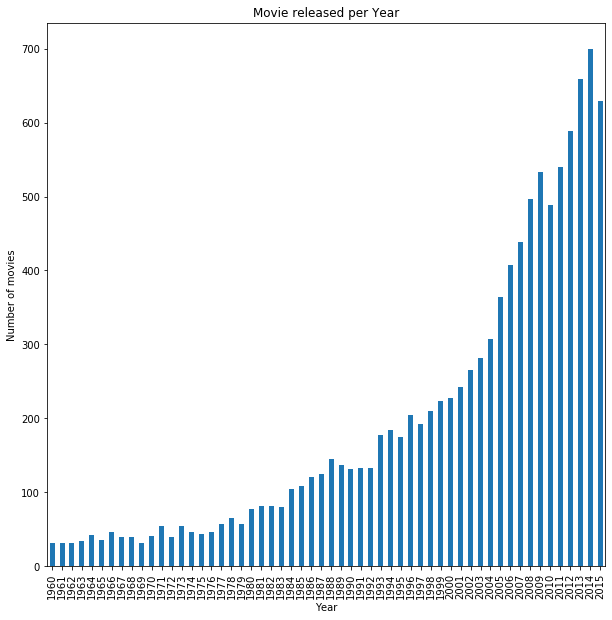

In [109]:
df_movie_count.plot(kind = 'bar',figsize=[10,10])
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.title('Movie released per Year')
plt.grid(False)

##### CONCLUSION - 700 movies were produced in 2014 which was the highest.
<hr>
</br>

### What is the average runtime of the movies which are sorted based on their ratings?

Let us first split the ratings into 4 categories
1. Below Average *(Rating <= 5)*
2. Average *(Rating between 5 and 7)*
3. Good *(Rating of 7 or 8)*
4. Highly Recommended *(Rating > 8)*

In [78]:
bin_edges = [1,5,7,8,10]
bin_names = ['below_average', 'average', 'good', 'highly_recommended']

Add movie column name as Highly_recommended

In [94]:
tmdb['Movie_Recomandation']=pd.cut(tmdb['vote_average' ],bin_edges,labels=bin_names)

</br>
Plot a graph for Movie_Recommendation VS Runtime

Movie_Recommendation is based on Ratings by viewers

Text(0.5, 1.0, 'Average runtime of movies based on their Rating Groups')

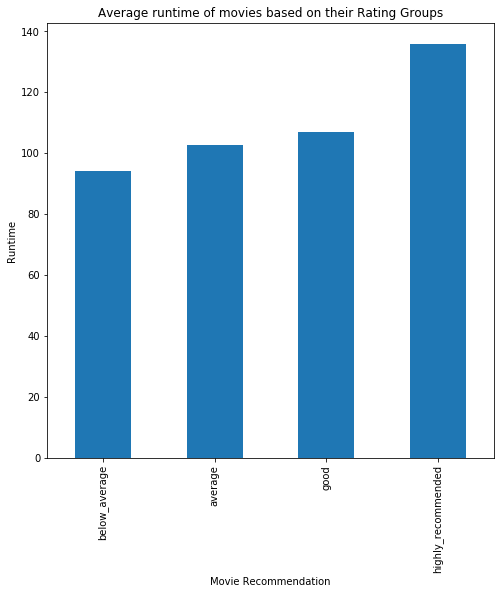

In [128]:
tmdb_runtime=tmdb.groupby('Movie_Recomandation').mean().runtime
tmdb_runtime.plot(kind='bar',figsize=(8,8))
plt.xlabel('Movie Recommendation')
plt.ylabel('Runtime')
plt.title('Average runtime of movies based on their Rating Groups')

##### CONCLUSION - Highly rated movie by viewers will always run longer in theaters ie, those movies which are rated above 8 have an average runtime of 139 days.
<hr>

</br>

### Which genres are most liked by viewers?

Create a dataframe copy to work with.

In [99]:
df1 = tmdb.copy()

</br>
Creating a function to split genres seperated by ' __|__ ' and create new column in a seperate data frame

In [101]:
def getGenre():
    new = []
    for c in df1.index:
        a = str(df1['genres'][c]).split('|')
        for d in a:
            new.append(d)
    temp = pd.Series(new)
    count = temp.value_counts(ascending=False)
    genres = list(dict.fromkeys(new))
    
    return [genres, count]

The Function __*getGenre*__ returns 2 lists ie -
1. A list of all Genres
2. A list of counts for all Genres

This can be seen in the following 2 blocks

In [114]:
# List of all genres (sample 3 elements)
getGenre()[0][:3]

['Action', 'Adventure', 'Science Fiction']

In [113]:
# Count of movies per genre (sample 3 elements)
getGenre()[1][:3]

Drama       4760
Comedy      3793
Thriller    2907
dtype: int64

In [104]:
votes = np.array(df1['vote_average'])
genres = getGenre()[0]
genres_list = list(map(str, df1['genres']))
votes_df = pd.DataFrame(index = genres, columns = ['sum', 'avg']) 
j = 0
votes_df.fillna(0, inplace = True)
for i in genres_list:
        a = i.split('|')
        votes_df.loc[a,"sum"] = votes_df.loc[a,"sum"] + votes[j]
        j += 1

Created a seperate Dataframe __*votes_df*__ having three colums -
1. __Genres__ have 20 unique flavors of movies,
2. __Sum__ is the addition of votes for each flavor of movies,
3. __Avg__ = (the total votes per geners) / (No of movies in each genres )

In [116]:
votes_df[0:3]

,sum,avg
Action,13798.0,5.787752
Adventure,8738.6,5.940585
Science Fiction,6963.0,5.665582


Calculate the __*avg*__ field as follows

In [105]:
votes_df["avg"] = votes_df["sum"] / getGenre()[1]

</br>
Plotting graph for highest liked genres on basis of viewer's votes

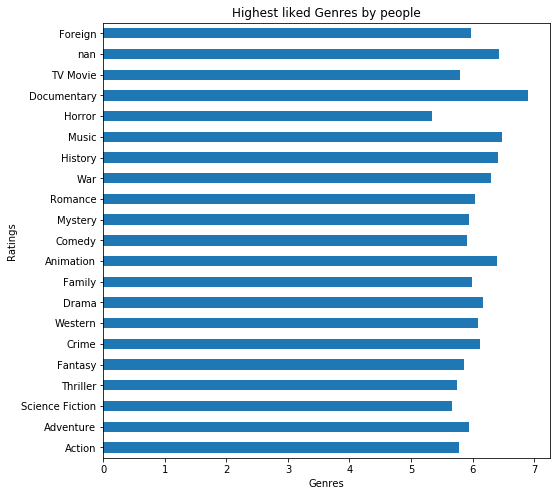

In [126]:
votes_df['avg'].plot(kind ='barh',figsize=(8,8))
plt.xlabel('Genres')
plt.ylabel('Ratings')
plt.title('Highest liked Genres by people')
plt.grid(False)

##### CONCLUSION - Documentaries are the most liked genre by viwers.
<hr>

</br>

### Which flavor of movies have the most number of releases?

Let us use the __*getGenre*__ function again and this time use the counts to plot the number of movie releases by genre.

In [129]:
getGenre()[1][:3]

Drama       4760
Comedy      3793
Thriller    2907
dtype: int64

Text(0.5, 1.0, 'Highest movie releases by genre')

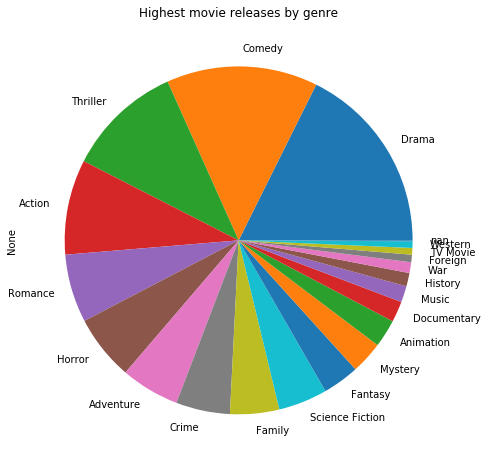

In [122]:
getGenre()[1].plot(kind='pie',figsize=(8,8))
plt.title('Highest movie releases by genre')

##### CONCLUSION - Drama is the highest released genre having 4760 movie releases.

<hr>

<a id='conclusions'></a>
## Conclusions

>  700 movies were produced in 2014 which was the highest.

>  Highly rated movie by viewers will always run longer in theaters ie, those movies which are rated above 8 have an average runtime of 139 days.

>  Documentaries are the most liked genre by viwers.

>  Drama is the highest released genre having 4760 movie releases.